In [22]:
# Dependencies
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [121]:
# import csv and quick clean dataframe for modeling
star_df = pd.read_csv(os.path.join("..", "Resources", "movie_metadata_adjusted_revenue_starpower.csv"))
star_df['budget'] = star_df['budget'].str.replace(',','').astype(float).astype(int)
star_df['revenue'] = star_df['revenue'].str.replace(',','').astype(float).astype(int)
star_df['popularity'] = star_df['popularity'].astype(int)
star_df['star_power'] = star_df['star_power'].astype(str)
star_df['vote_count'] = star_df['vote_count'].astype(int)

star_df2 = star_df.drop(columns={'Column1','title','release_date'}, axis=1)

In [122]:
star_df_final = pd.concat([star_df2,pd.get_dummies(star_df2['first_genre'], dummy_na=False)], axis=1)
star_df_final.drop(['first_genre'], axis=1, inplace=True)
star_df_final

,budget,popularity,revenue,runtime,vote_average,vote_count,star_power,Action & Adventure,Animation,Art House & International,...,Comedy,Cult Movies,Drama,Horror,Kids & Family,Mystery & Suspense,None,Romance,Science Fiction & Fantasy,Western
0,36703349,41,1499126346,175,8.5,6024,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,43134278,51,48899552,142,8.5,8358,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,96693277,63,154791744,139,8.3,9678,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,38930103,41,568672494,195,8.3,4436,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,14258364,35,517964907,133,8.3,3001,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,175859697,9,373412184,103,4.7,1180,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1077,64806136,9,169652635,95,4.7,1163,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1078,129468354,17,181231524,100,4.4,2322,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1079,199143302,17,379498823,125,4.2,1447,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# set up data, target and feature_names variables for future use
target = star_df_final['star_power']
data = star_df_final.drop("star_power", axis=1)
feature_names = data.columns
feature_names

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'Action & Adventure', 'Animation',
       'Art House & International', 'Classics', 'Comedy', 'Cult Movies',
       'Drama', 'Horror', 'Kids & Family', 'Mystery & Suspense', 'None',
       'Romance', 'Science Fiction & Fantasy', 'Western'],
      dtype='object')

In [6]:
# setup rf model
rf = RandomForestClassifier(max_depth=3, random_state=1)
rf.fit(data, target)

/Users/brian.abbe/anaconda3/envs/Pythondata/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [7]:
# bin the data with KBinsDiscretizer by clusters with kmeans
target_model = target.to_numpy().reshape(-1, 1)
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
enc.fit(target_model)
result = enc.transform(target_model)
str_result = enc.transform(target_model)
str_final = np.ravel(str_result).astype(str)

In [8]:
# rerun rf on binned data
rf2 = RandomForestClassifier(max_depth=4, random_state=5, n_estimators=200)
rf2.fit(data, np.ravel(result))
print(rf2.feature_importances_)

[9.05780744e-02 3.75565052e-02 5.16441668e-02 1.23935141e-01
 4.16357752e-02 5.25186910e-02 5.43584178e-02 9.77933747e-03
 5.67882367e-04 2.13756245e-02 1.69961044e-02 4.78831578e-05
 3.36540159e-02 3.42527379e-02 2.94049078e-03 1.43697192e-03
 4.24296344e-01 1.93174904e-03 4.94087185e-04 0.00000000e+00]


In [9]:
# sort feature_importances with title in descending order
sorted(zip(rf2.feature_importances_,feature_names), reverse=True)

[(0.4242963437796164, 'None'),
 (0.12393514106634136, 'runtime'),
 (0.09057807442178399, 'budget'),
 (0.05435841776512103, 'Action & Adventure'),
 (0.05251869101492465, 'vote_count'),
 (0.05164416682638398, 'revenue'),
 (0.04163577522542936, 'vote_average'),
 (0.037556505166743165, 'popularity'),
 (0.034252737920546034, 'Horror'),
 (0.03365401591664238, 'Drama'),
 (0.02137562452943025, 'Classics'),
 (0.016996104446738557, 'Comedy'),
 (0.009779337472934475, 'Animation'),
 (0.0029404907847681034, 'Kids & Family'),
 (0.0019317490371937318, 'Romance'),
 (0.0014369719152270818, 'Mystery & Suspense'),
 (0.000567882367062887, 'Art House & International'),
 (0.0004940871853025713, 'Science Fiction & Fantasy'),
 (4.7883157810136604e-05, 'Cult Movies'),
 (0.0, 'Western')]

In [10]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importances, 2)) for feature, importances in zip(feature_names, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:1} Importance: {}'.format(*pair)) for pair in feature_names];

Variable: b Importance: u
Variable: p Importance: o
Variable: r Importance: e
Variable: r Importance: u
Variable: v Importance: o
Variable: v Importance: o
Variable: A Importance: c
Variable: A Importance: n
Variable: A Importance: r
Variable: C Importance: l
Variable: C Importance: o
Variable: C Importance: u
Variable: D Importance: r
Variable: H Importance: o
Variable: K Importance: i
Variable: M Importance: y
Variable: N Importance: o
Variable: R Importance: o
Variable: S Importance: c
Variable: W Importance: e


In [11]:
# setup train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, result, random_state=1)

In [21]:
# scale the data and get an accuracy score
scaler = StandardScaler()
scaler.fit(X_train)

rf2 = rf2.fit(X_train, np.ravel(y_train))
score = rf2.score(X_test, y_test)
print(f"Score: {score}")

predictor = rf2.predict_proba(X_test)
print(predictor)

Score: 0.8450184501845018
[[0.26100506 0.70594953 0.02963546 0.00340996]
 [0.14391565 0.82328249 0.0282758  0.00452605]
 [0.16238815 0.80268747 0.03249445 0.00242993]
 ...
 [0.19285622 0.76799482 0.03664721 0.00250176]
 [0.13458991 0.82145771 0.0416879  0.00226448]
 [0.23848016 0.73122527 0.02671743 0.00357714]]


In [ ]:
# generate a graphviz and save visual
estimator = rf2.estimators_[39]

export_graphviz(estimator, out_file='star.dot', 
                feature_names = feature_names,
                class_names = str_final,filled=True,
                rounded = True, proportion = False)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'star.dot', '-o', 'stars.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'stars.png')

In [ ]:
estimator = rf2.estimators_[63]

export_graphviz(estimator, out_file='star_second.dot', 
                feature_names = feature_names,
                class_names = str_final,filled=True,
                rounded = True, proportion = False)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'star_second.dot', '-o', 'stars_second.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'stars_second.png')

In [ ]:
estimator = rf2.estimators_[26]

export_graphviz(estimator, out_file='star_third.dot', 
                feature_names = feature_names,
                class_names = str_final,filled=True,
                rounded = True, proportion = False)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'star_third.dot', '-o', 'stars_third.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'stars_third.png')

In [103]:
# setup a quick dataframe to sort score in descending order to plot
df = pd.DataFrame({'variables': feature_names,'values':importances})
df_sorted = df.loc[(df['values'] > 0)]
df_sorted = df_sorted.sort_values(by=['values'], ascending=False)
df_sorted.reset_index(inplace=True)
df_sorted

,index,variables,values
0,16,None,0.441465
1,3,runtime,0.233690
2,0,budget,0.085901
3,13,Horror,0.069295
4,2,revenue,0.042952
5,6,Action & Adventure,0.033513
6,4,vote_average,0.029012
7,12,Drama,0.017185
8,1,popularity,0.014650
9,10,Comedy,0.012082


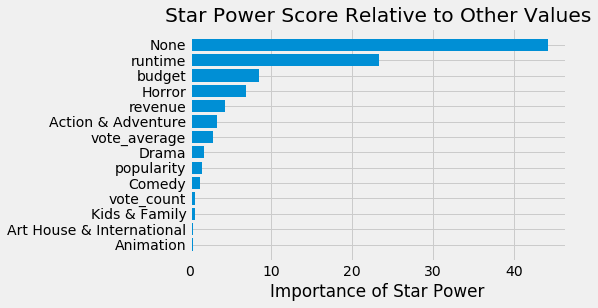

In [119]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
y_values = df_sorted['variables']
important = df_sorted['values'] * 100

ax.barh(y_values, important, align='center')
ax.set_yticks(y_values)
ax.set_yticklabels(y_values)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importance of Star Power')
ax.set_title('Star Power Score Relative to Other Values')

plt.show()
# save into output folder
fig.savefig('../Output/star_hbar.png')

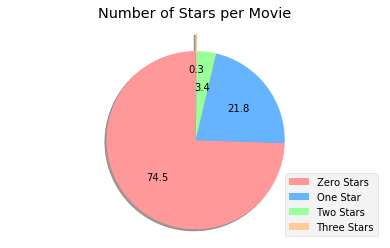

In [116]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
%matplotlib inline

star_power_plot = star_df['star_power'].value_counts()

fig, ax = plt.subplots()
labels = ('Zero Stars','One Star', 'Two Stars', 'Three Stars')
colors  = ('#ff9999','#66b3ff','#99ff99','#ffcc99')
explode = (0, 0, 0, 0.2)

# Draw the pie chart
ax.pie(star_power_plot,
    explode=explode,
    colors=colors,
    shadow=True,
    autopct='%1.1f',
    startangle=90)

plt.legend(labels, loc="best")
plt.title('Number of Stars per Movie')

# Aspect ratio - equal means pie is a circle
ax.axis('equal')
plt.show()
fig.savefig('../Output/star_pie.png')